Data science is used to extract interesting insights and make decision-makers take the best direction for their companies. In the case of car prices prediction, companies could use this technology to determine the prices of new cars that they produce which will help them to set the most accurate prices for their cars based on the market value of cars. As a result, optimal prices for cars could be set leading to better growth and outcomes for car manufacturers respectively.

It is now time to jump into the code and see how to use machine learning to predict the prices of cars.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv("CarPrice.csv")
data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
print(data.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

It is now time to perform exploratory data analysis for the data to get interesting insights from data.

Heatmap is useful under the Seaborn library. It gives us a good colored estimate of the values. Depending on the palette chosen, we either get bright images for higher values or vice-versa. We are plotting a correlation plot between the various features.

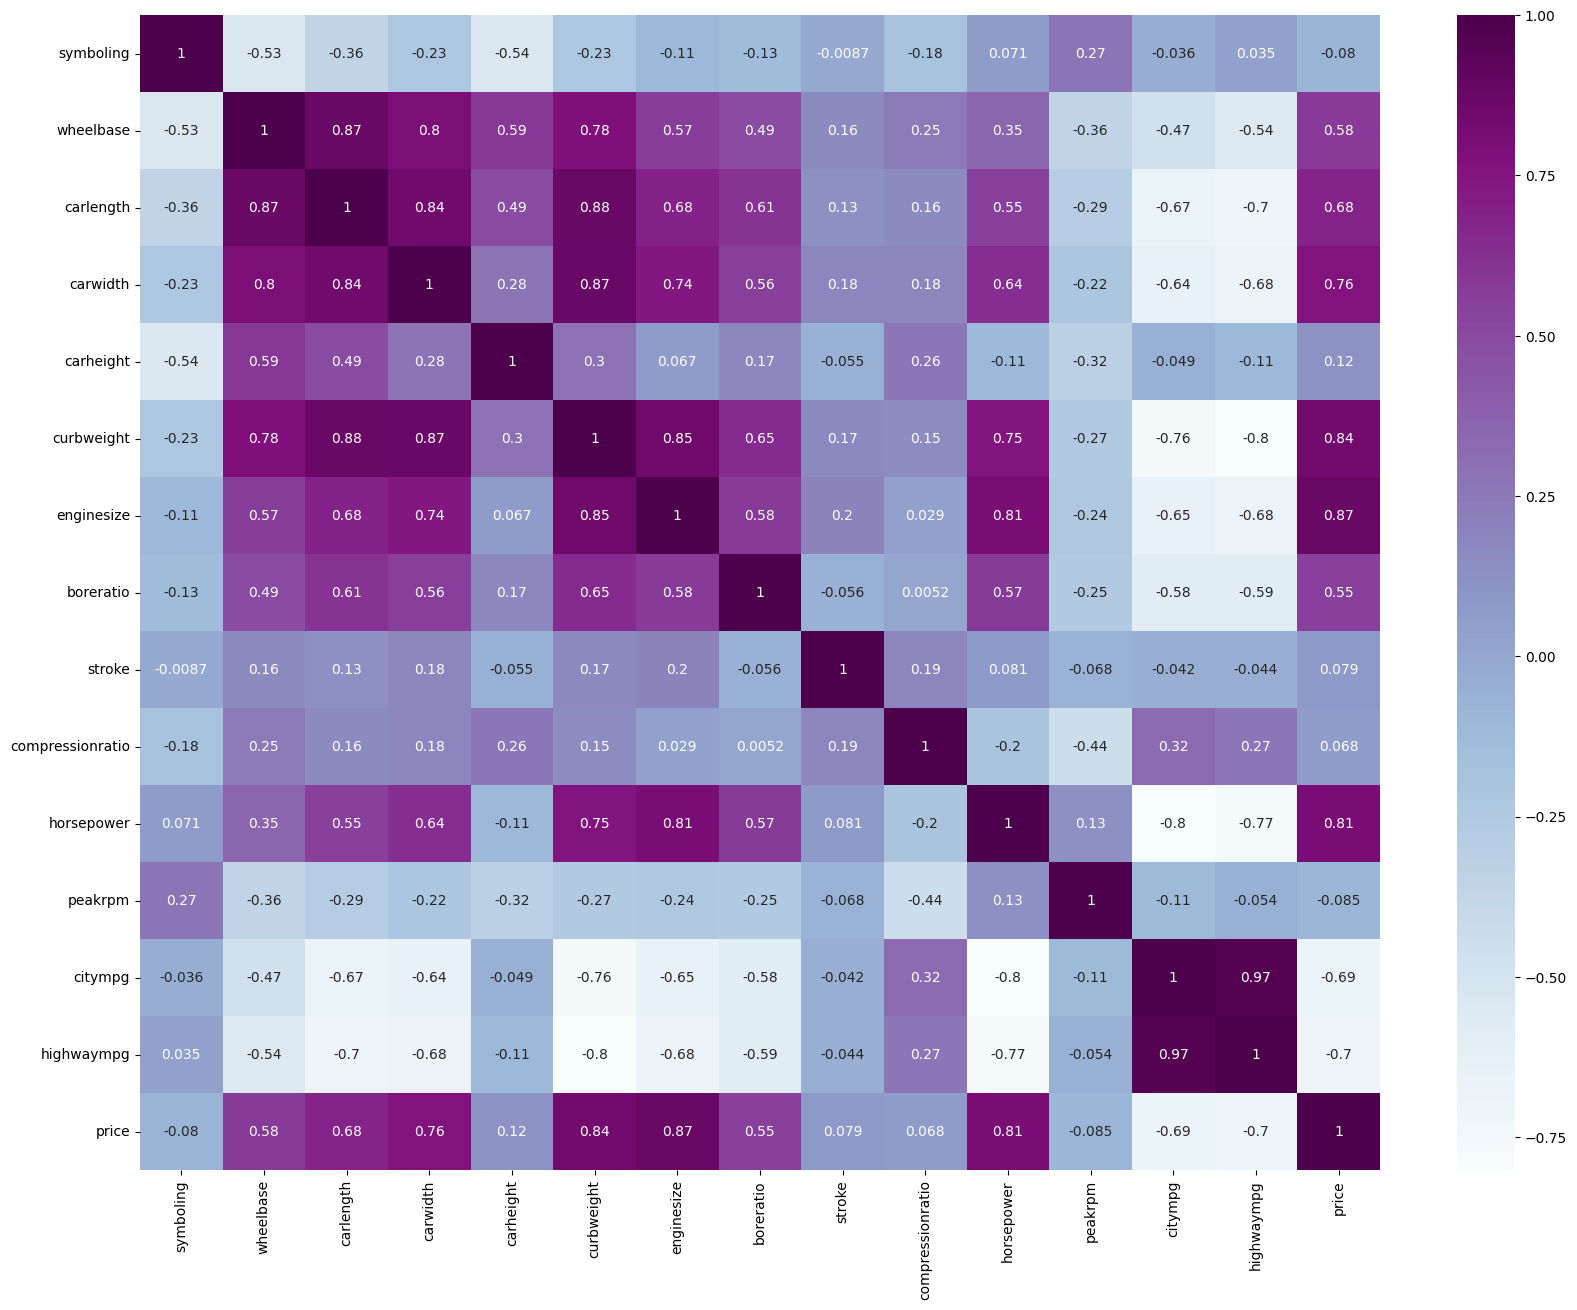

In [ ]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="BuPu", annot=True)
plt.show()

Machine Learning Analysis
After successfully converting the values into numerical vectors, it is now time to use our machine learning models for predicting the prices of cars. We will first start with a very simple model such as Linear Regression

In [ ]:
X = data.drop(columns=['price'])
y = data['price']


from sklearn.model_selection import train_test_split # import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

import pandas as pd 
import statsmodels.api as sm 

def backward_regression(X, y,
                           initial_list = [], 
                           threshold_in = 0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included = list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() 
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        if not changed:
            break
    return included

backward_regression(X_train, y_train)

['carwidth',
 'enginesize',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm']

In [ ]:
X = data[backward_regression(X_train, y_train)]
y = data['price']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn import linear_model 
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

from sklearn.metrics import r2_score
yhat = regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))

print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - y_test) ** 2)) 

print("R2-score: %.2f" % r2_score(y_test, yhat))

Mean absolute error: 2693.15
Residual sum of squares (MSE): 14542972.99
R2-score: 0.81


A car price prediction has been a
highinterest research area, as it requires noticeable
effort and knowledge of the field expert.
Considerable number of distinct attributes are
examined for the reliable and accurate prediction.

Conclusion
The increased prices of new cars and the financial
incapability of the customers to buy them, Used Car
sales are on a global increase. Therefore, there is an
urgent need for a Used Car Price Prediction system
which effectively determines the worthiness of the
car using a variety of features. The proposed system
will help to determine the accurate price of used car
price prediction.